# Loan Approval Prediction

.

# About the dataset

.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df=df.drop('loan_id',axis=1)

In [6]:
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [7]:
df = df.drop([' luxury_assets_value',' bank_asset_value',' commercial_assets_value',' residential_assets_value'],axis=1)

In [8]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


.

In [9]:
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

#  Rejected  : 0
#  Approved : 1

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel=' no_of_dependents', ylabel='count'>

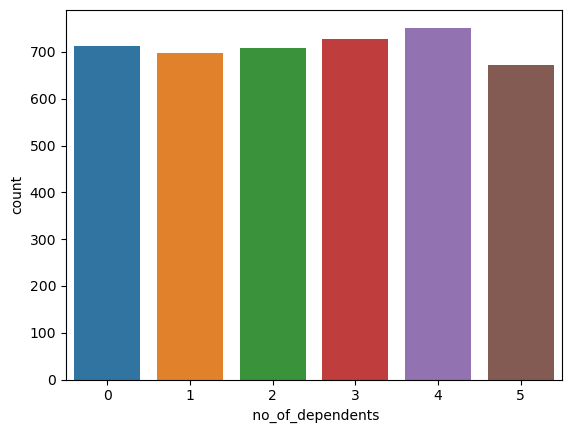

In [11]:
sns.countplot(x=' no_of_dependents',data=df)

<Axes: xlabel=' no_of_dependents', ylabel='count'>

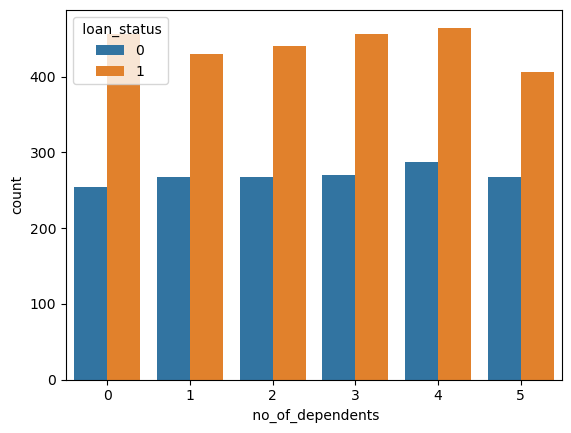

In [12]:
sns.countplot(x=' no_of_dependents',data=df,hue=' loan_status')

In [13]:
df.groupby([' no_of_dependents'])[' loan_status'].mean()

 no_of_dependents
0    0.641854
1    0.616930
2    0.622881
3    0.628611
4    0.618351
5    0.603269
Name:  loan_status, dtype: float64

.

.

<Axes: xlabel=' education', ylabel=' income_annum'>

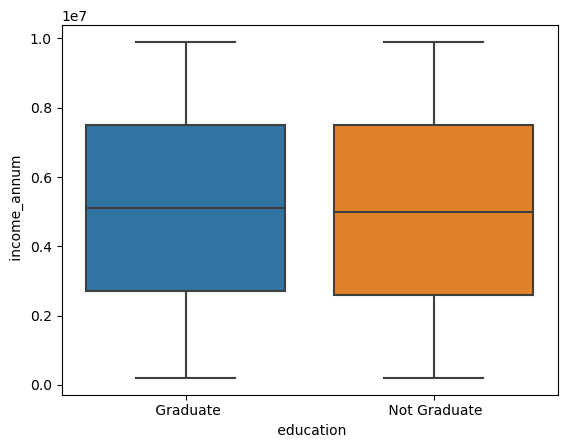

In [14]:
sns.boxplot(x=' education',y=' income_annum',data=df)

<Axes: xlabel=' education', ylabel='count'>

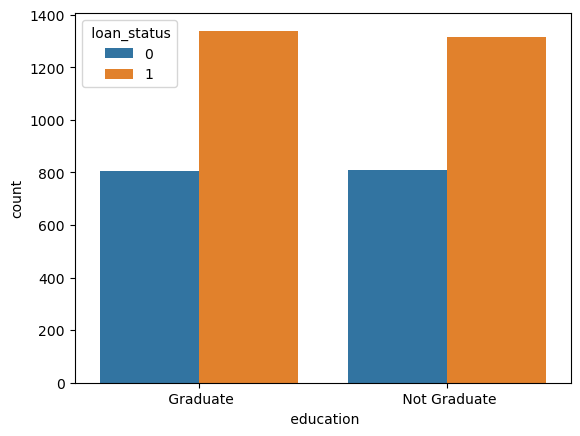

In [15]:
sns.countplot(x=' education',hue=' loan_status',data=df)

.

.

<Axes: xlabel=' self_employed', ylabel='count'>

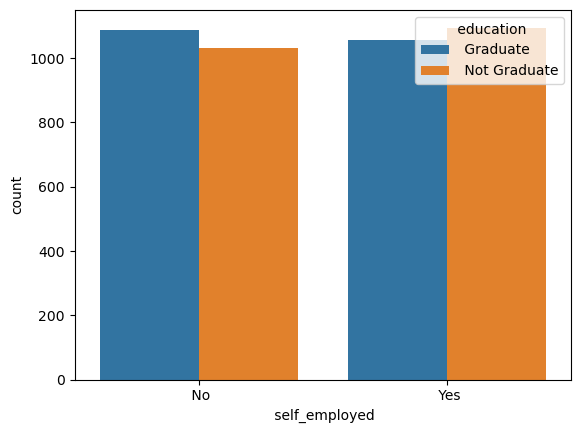

In [16]:
sns.countplot(x=' self_employed',data=df,hue=' education')

In [17]:
df.groupby([' education'])[' loan_status'].mean()

 education
 Graduate        0.624534
 Not Graduate    0.619765
Name:  loan_status, dtype: float64

In [18]:
df.groupby([' self_employed'])[' loan_status'].mean()

 self_employed
 No     0.621992
 Yes    0.622326
Name:  loan_status, dtype: float64

.

.

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

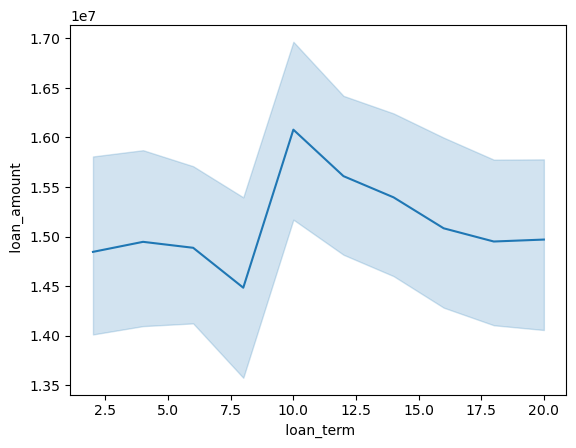

In [19]:
sns.lineplot(x=' loan_term',y=' loan_amount',data=df)

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

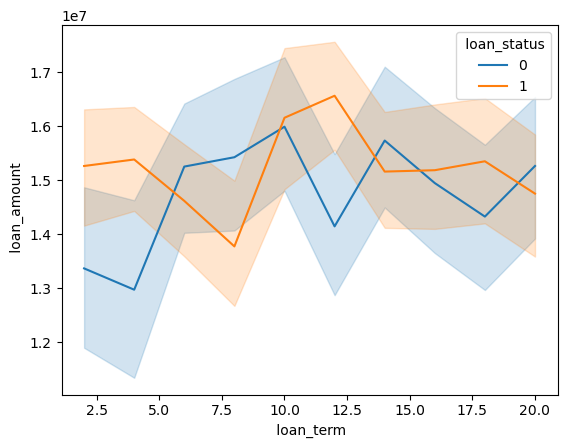

In [20]:
sns.lineplot(x=' loan_term',y=' loan_amount',hue=' loan_status',data=df)

In [21]:
df.groupby([' loan_term'])[' loan_status'].mean()

 loan_term
2     0.779703
4     0.818792
6     0.575510
8     0.569948
10    0.525229
12    0.605263
14    0.590123
16    0.572816
18    0.609005
20    0.574209
Name:  loan_status, dtype: float64

.

.

<Axes: xlabel=' cibil_score', ylabel='Count'>

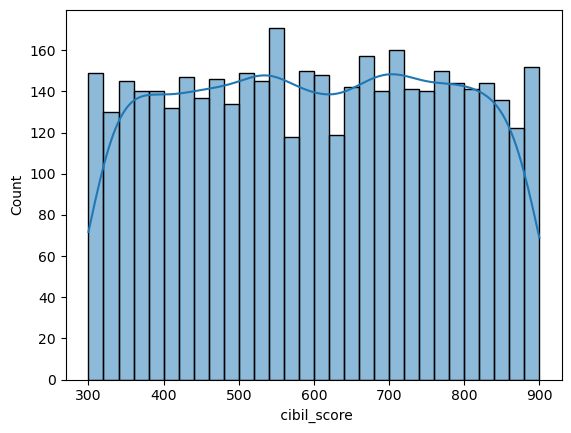

In [22]:
sns.histplot(df[' cibil_score'],bins=30,kde=True)

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

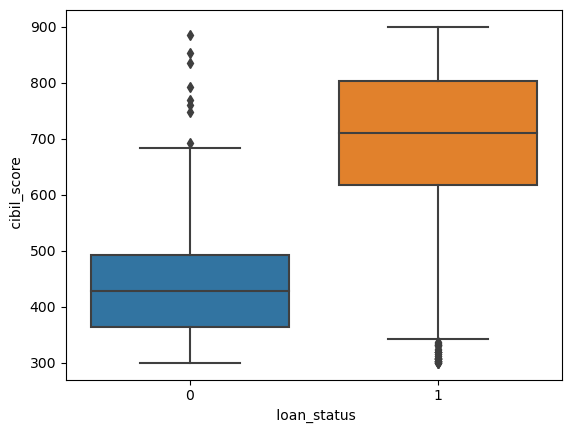

In [23]:
sns.boxplot(x=' loan_status',y=' cibil_score',data=df)

In [24]:
df.groupby([' cibil_score'])[' loan_status'].mean()

 cibil_score
300    0.272727
301    0.000000
302    0.153846
303    0.000000
304    0.500000
         ...   
896    1.000000
897    1.000000
898    1.000000
899    1.000000
900    1.000000
Name:  loan_status, Length: 601, dtype: float64

.

.

<Axes: xlabel='Movable_assets', ylabel='Count'>

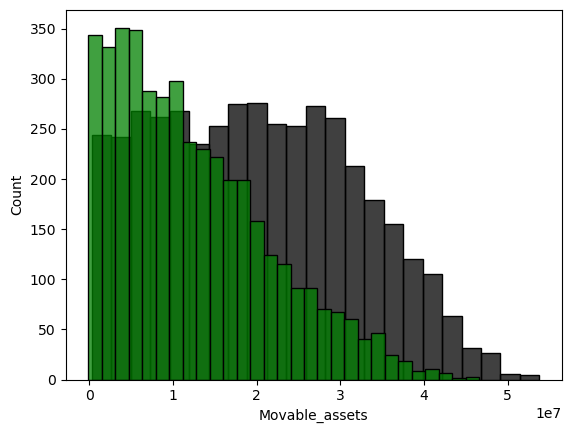

In [25]:
sns.histplot(df['Movable_assets'],color='black')
sns.histplot(df['Immovable_assets'],color='green')

.

.

In [27]:
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})

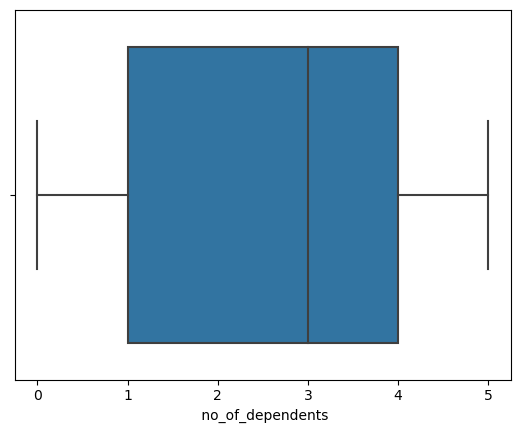

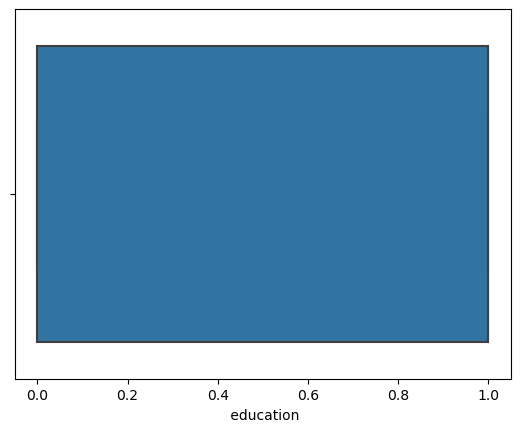

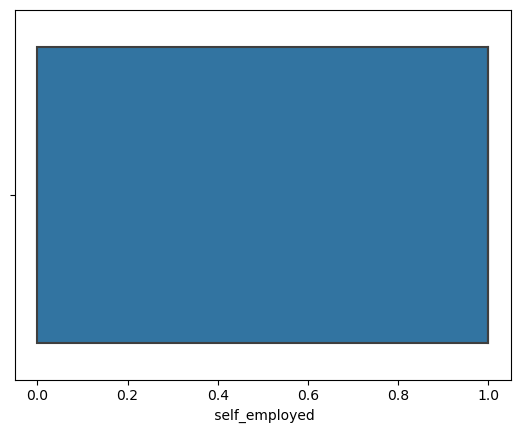

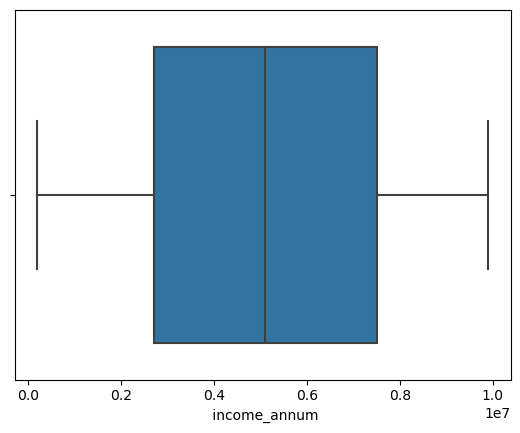

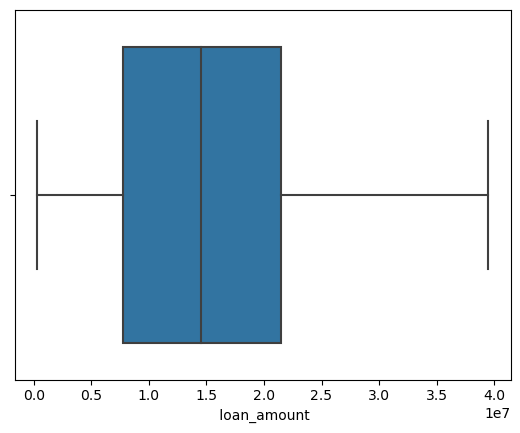

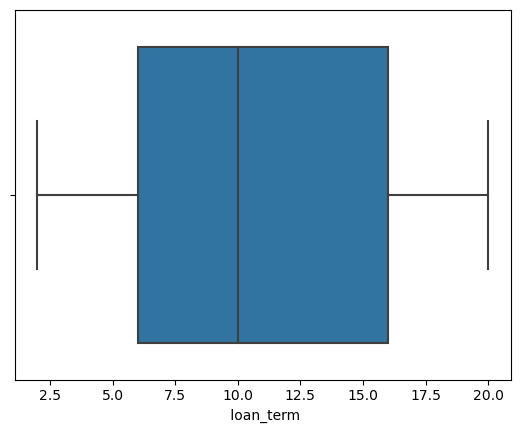

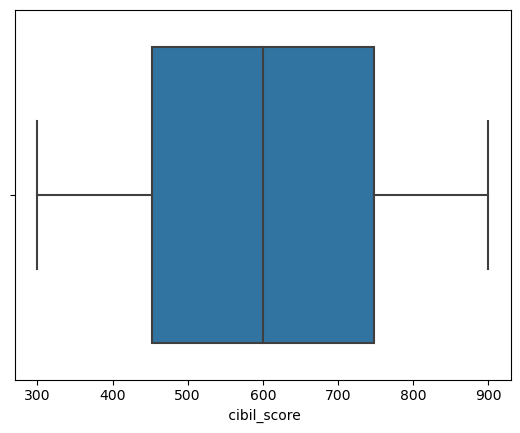

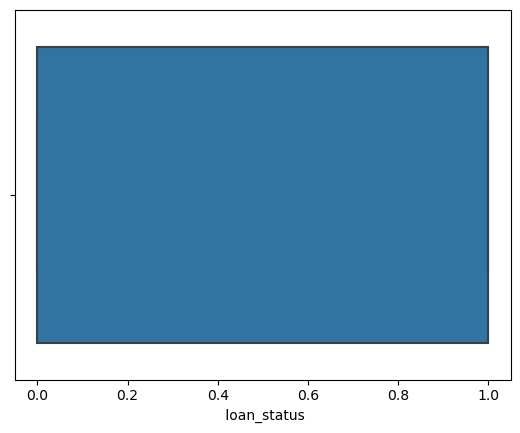

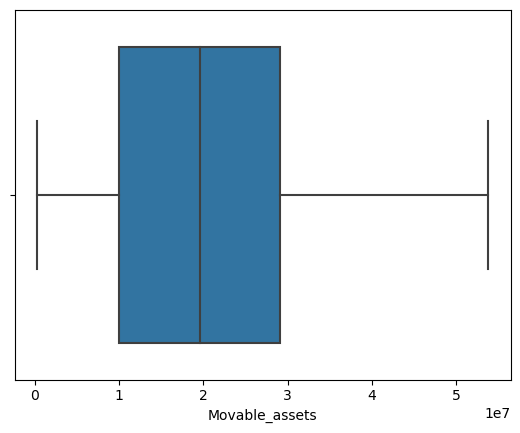

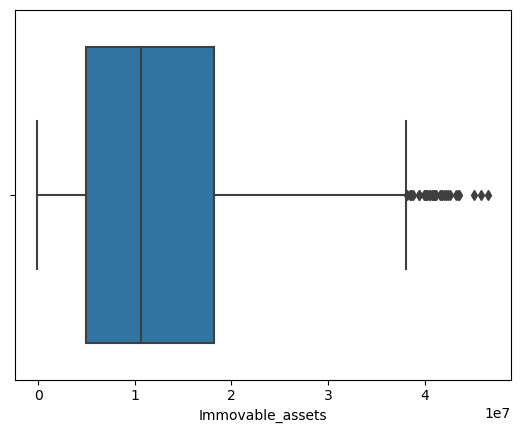

In [28]:
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

 no_of_dependents
-0.017964228035582553


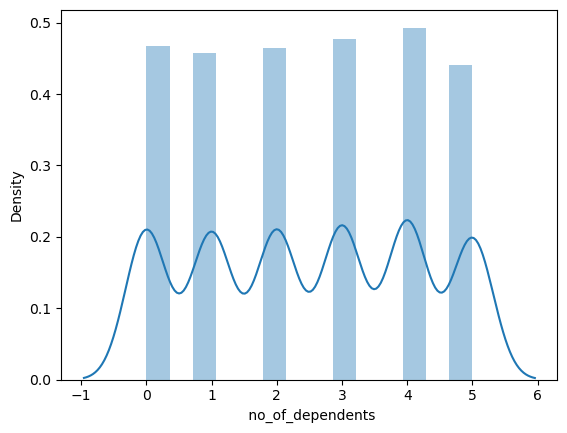

 education
-0.00890147022018139


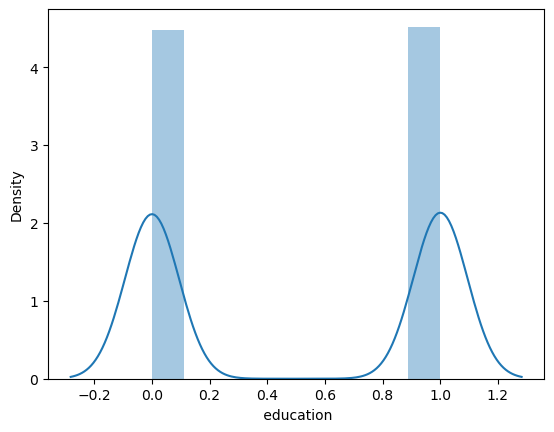

 self_employed
-0.014523690500055735


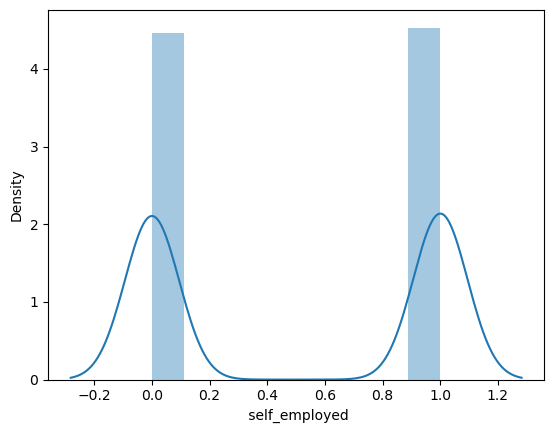

 income_annum
-0.012809922048151696


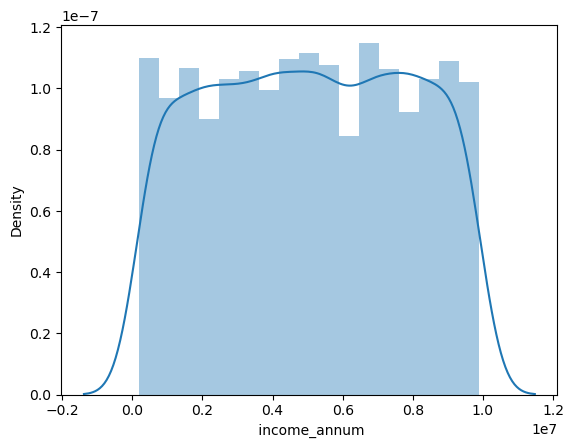

 loan_amount
0.3086153978159286


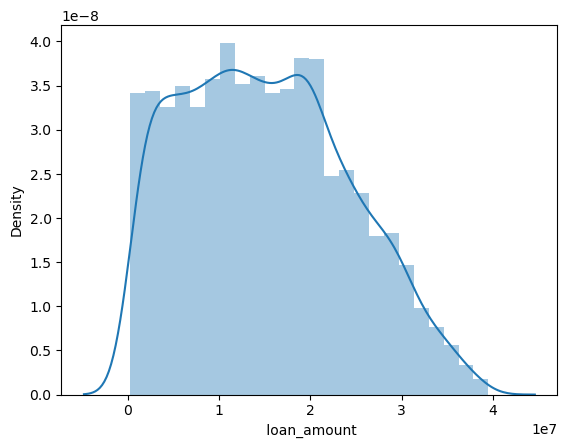

 loan_term
0.03634613066755639


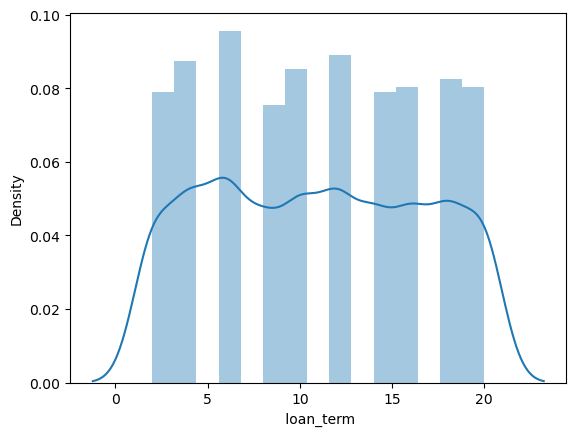

 cibil_score
-0.009036100886026986


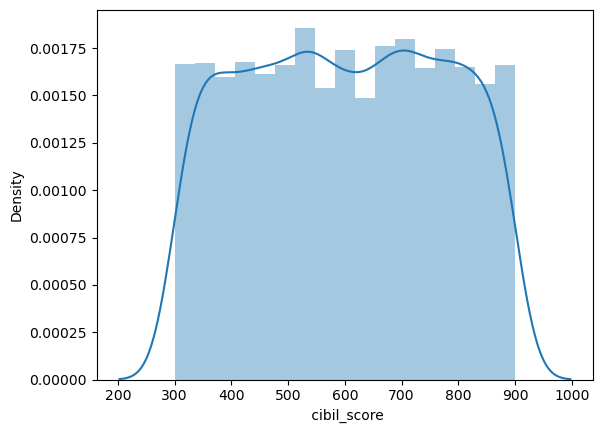

 loan_status
-0.503910130474975


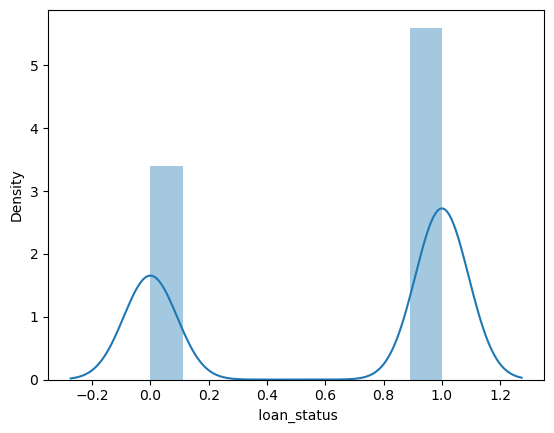

Movable_assets
0.2304281736579439


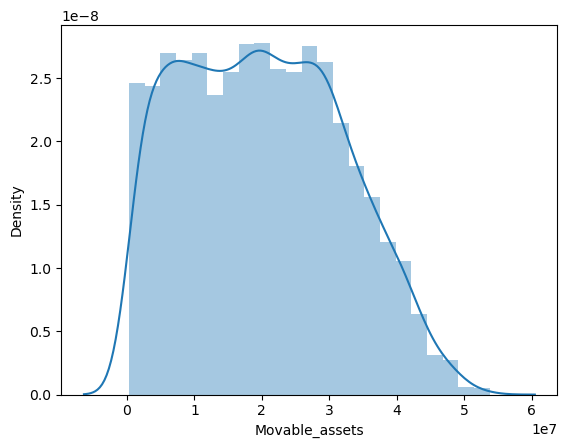

Immovable_assets
0.8255066160373123


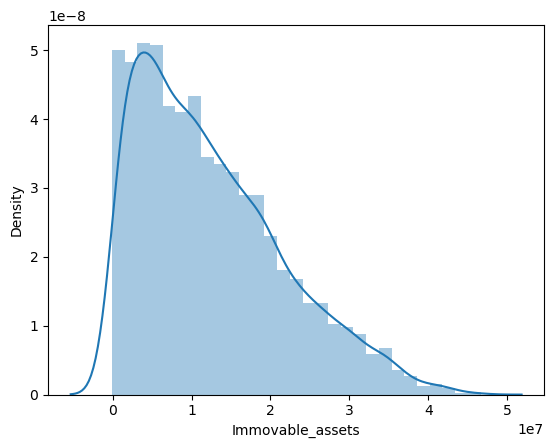

In [30]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

#  loan_status
###  Rejected  : 0
###  Approved : 1

<Axes: >

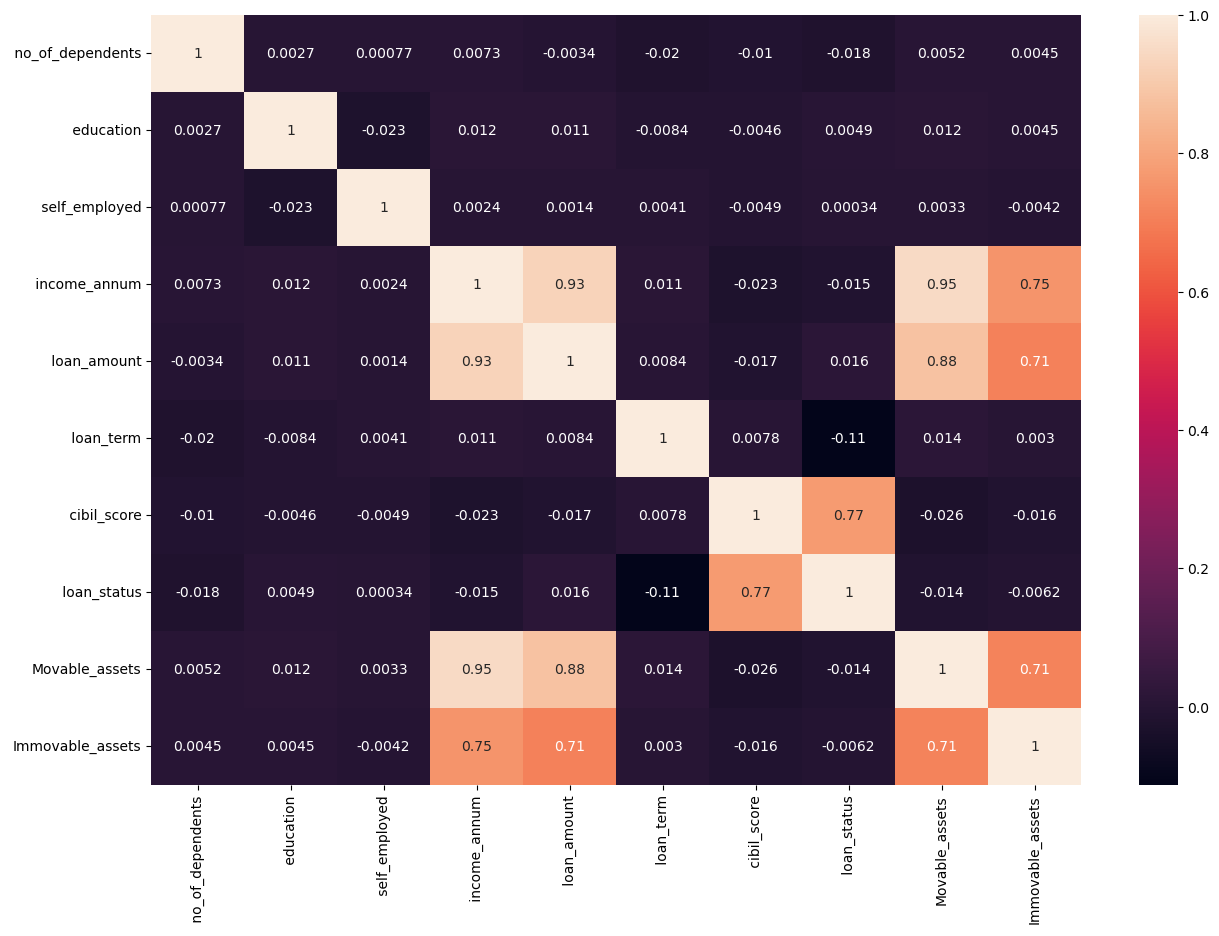

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [32]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       'Movable_assets', 'Immovable_assets'],
      dtype='object')

In [33]:
# removing highly correlated columns
df2 = df.drop(['Immovable_assets','Movable_assets',' income_annum'],axis=1)

<Axes: >

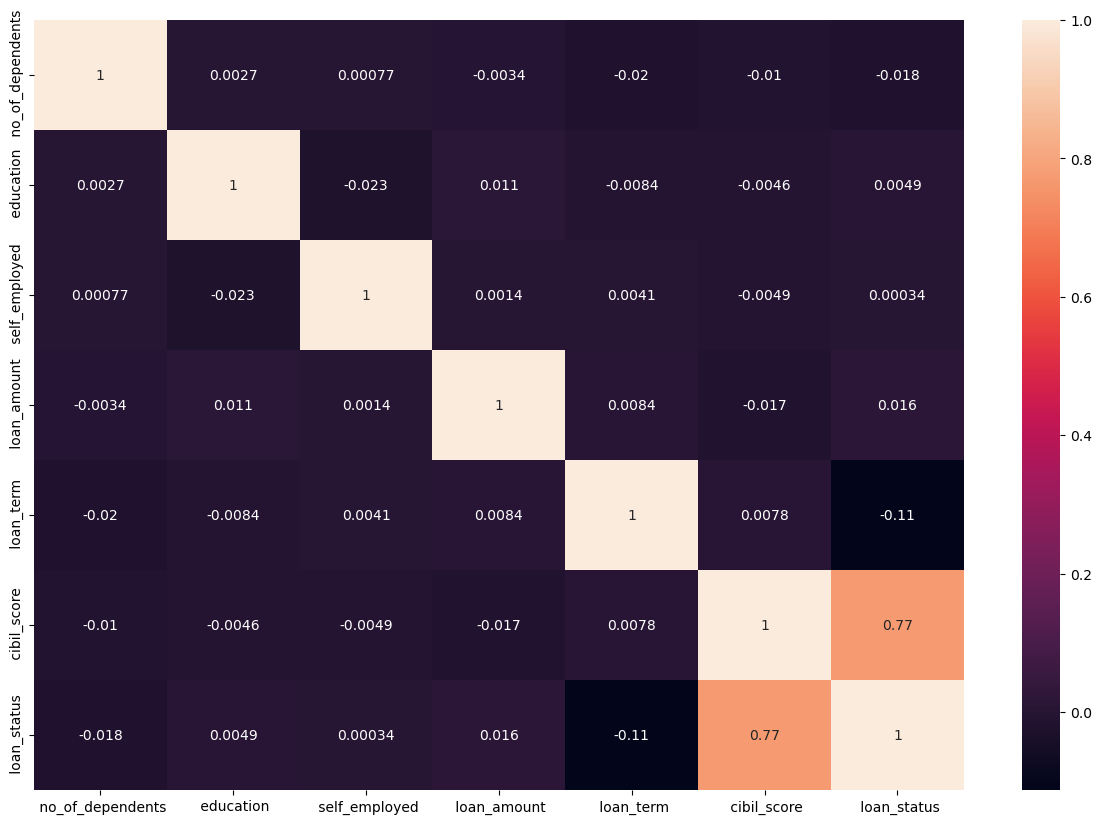

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

.

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

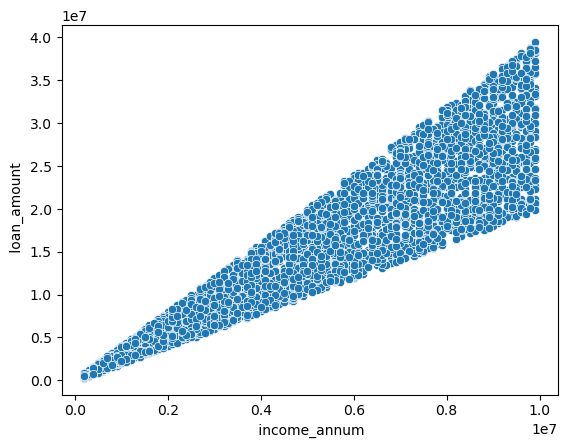

In [35]:
sns.scatterplot(x=' income_annum',y=' loan_amount',data=df)

.

<Axes: ylabel=' loan_status'>

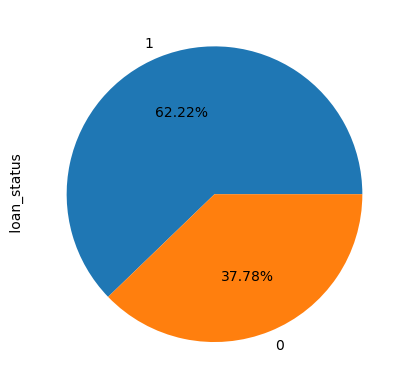

In [36]:
df[' loan_status'].value_counts().plot.pie(autopct='%.2f%%')

In [37]:
x = df2.drop(' loan_status',axis=1)
y =df2[' loan_status']

from sklearn.model_selection import train_test_split, cross_val_score
x_train_sca,x_test_sca,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.30)

In [38]:
x_train_sca.shape

(2988, 6)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [40]:
rfc= RandomForestClassifier(max_depth=5)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  0.9738955823293173
Testint :  0.960967993754879
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       471
           1       0.98      0.96      0.97       810

    accuracy                           0.96      1281
   macro avg       0.96      0.96      0.96      1281
weighted avg       0.96      0.96      0.96      1281

[0.96348315 0.97191011 0.96348315 0.9747191  0.9494382  0.96910112
 0.96348315 0.96910112 0.96348315 0.94647887 0.96056338 0.96619718]
0.9634534736508941
difference -0.002485479896015108
[[454  17]
 [ 33 777]]


In [41]:
dtc= DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())
print(confusion_matrix(y_test,dtcy_pred))

Training  :  0.9692101740294511
Testint :  0.9539422326307572
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       471
           1       0.97      0.96      0.96       810

    accuracy                           0.95      1281
   macro avg       0.95      0.95      0.95      1281
weighted avg       0.95      0.95      0.95      1281

[0.96487119 0.94262295 0.96487119 0.96018735 0.95779601]
0.9580697414552851
difference -0.004127508824527948
[[444  27]
 [ 32 778]]


.

# Randomforest performed best